# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1


**Data Exploration**

In [18]:
#import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #library for graphs
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #set up auto format

In [19]:
#Link dataset
Link = 'https://drive.google.com/file/d/1cOmuSNva-61vj3Q_U6qgW4sEH5YEskie/view?usp=sharing'
#Load Data
path = 'https://drive.google.com/uc?export=download&id='+Link.split('/')[-2]
df_fc = pd.read_csv(path,encoding= 'unicode_escape')

In [20]:
#df_fc.info()
#df_fc.describe()
#df_fc.head()

In [21]:
#Count missing value
num_na = df_fc[['linked_cases']].isna().sum().sum()
num_na

26

In [22]:
#Count unique value
num_uq = df_fc['cause'].nunique()
num_uq

5

In [23]:
#Group columns
df_gr = df_fc.groupby('cause')
df_gr_size = df_gr.size()
print (df_gr_size)

cause
 Meat          14
VEGETABLES     16
meat          943
unknown       713
vegetable     314
dtype: int64


In [24]:
# Replace column claim_amount
df_fc['claim_amount'] = df_fc['claim_amount'].str.replace('R\$ ', '')
df_fc['claim_amount'] = pd.to_numeric(df_fc['claim_amount'])

In [25]:
# Replace data
df_fc['amount_paid'] = df_fc['amount_paid'].fillna(df_fc['amount_paid'].mean())
df_fc['linked_cases'] = df_fc['linked_cases'].fillna(False)
df_fc['cause'] = df_fc['cause'].str.lower().str.replace('vegetables','vegetable').str.replace(' meat','meat')

In [26]:
#df_fc.describe()
#df_fc.info()
df_fc.sample(10)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
82,83,180,25538.87,22569.33,RECIFE,9,False,meat
189,190,118,14443.34,9777.64,RECIFE,7,False,vegetable
1340,1341,157,31944.10,24227.50,SAO LUIS,10,False,meat
1123,1124,190,25387.40,17218.52,NATAL,7,False,meat
696,697,160,26847.46,18789.09,SAO LUIS,13,False,vegetable
985,986,216,38500.49,36722.69,NATAL,15,False,meat
929,930,187,16029.96,13077.24,RECIFE,5,False,meat
1872,1873,139,5782.51,4524.27,RECIFE,2,False,meat
1431,1432,281,62717.98,47574.26,RECIFE,14,False,unknown
118,119,172,22762.93,22309.06,RECIFE,15,True,vegetable


In the data: 2000 rows × 8 columns

**claim_id:** This column is primary key. There are 2000 unique values that match the description given. There are no missing values. No changes were made to this column.

**time_to_close:** The values of this column ranged from 76 to 518, which is consistent with the description given. There are no missing values.  No changes were made to this column. 

**claim_amount:** The values of this column ranged from 1637.94 to 76106.80, which is consistent with the description given. There are no missing values. All values have had the character "R$" removed and have been converted to numeric format for calculation purposes.

**location:** This column has four categories, that match those in the description. There were no missing values and no changes were made to this column.

**amount_paid:** The values of this column ranged from 1516.72 to 52497.75, which is consistent with the description given. There are 36 missing value. All missing values were replaced with the mean total amount paid.

**individuals_on_claim:** The values of this column ranged from 1 to 15, which is consistent with the description given. There were no missing values and no changes were made to this column.

**linked_cases:** All of the values in this column were either True or False. There are 26 missing values. All missing values were replaced with false.

**cause:** There are 5 unique values in this column: ‘ Meat’, ‘VEGETABLES’, ‘meat’, ‘unknown’, ‘vegetable’. There are no missing values. All values are converted to lowercase and characters are removed so that the column has three categories matching the description.

## Task 2

In [27]:
df_fc_location = df_fc.groupby(['location']).agg(total_claim =('claim_id','count')).reset_index() #group by Location column
df_fc_location

,location,total_claim
0,FORTALEZA,311
1,NATAL,287
2,RECIFE,885
3,SAO LUIS,517


In the given data, there are four observed locations. The region with the highest total number of claims in the list is RECIFE, followed by SAO LUIS. FORTALEZA and NATAL have a relatively small difference in the number of claims.

The categories are unbalanced, with most observations being either RECIFE or SAO LUIS. The legal team should focus on the Recife area to improve how long it takes to reply to customers and close claims.

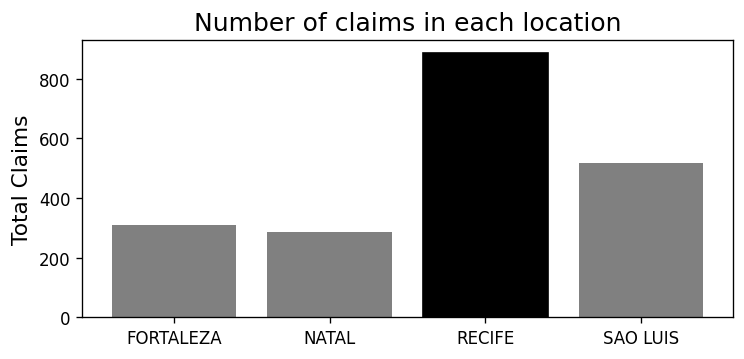

In [28]:
local_bar = plt.bar(df_fc_location['location'],df_fc_location['total_claim'], color='gray')
local_bar[2].set_color('black')
#plt.xlabel('Location',fontsize=13)
plt.ylabel('Total Claims',fontsize=13)
plt.title('Number of claims in each location',fontsize=15)
plt.show()

## Task 3

As the legal team thinks that the time to close a claims gets will be important, we should look at how the time to close is distributed.

Looking at all the time to close, we can see from the visualize below that most of the closing times fall within the range of 150 to 250. The distribution of closing times is right-skewed. The average time to close a claim is 179. However, there are still some cases with closing times ranging from 400 to 500.

To improve the claim closing time at different locations, the team should target locations with claim closing times above 300, but also pay attention to claims with times above 250.

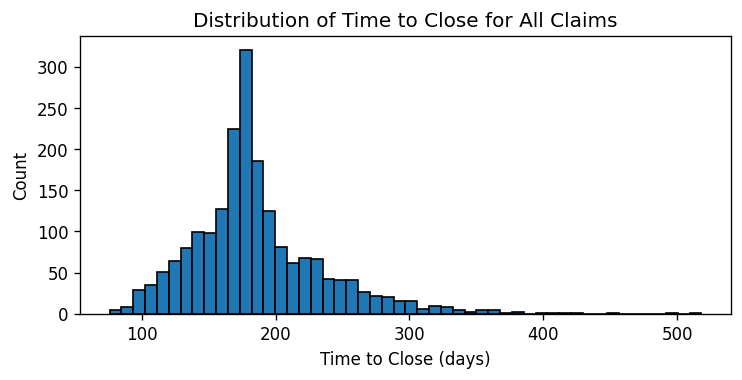

In [29]:
# Create a histogram plot
plt.hist(df_fc['time_to_close'], bins=50, edgecolor='black')

# Add labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Count')
plt.title('Distribution of Time to Close for All Claims')

# Display the plot
plt.show()

## Task 4

Finally, we want to analyze how the location type affects the time it takes to close a case. By examining the range of time to close by location, we can observe the impact of an outlier in the data. The graphic below illustrates how this outlier dominates the data, making it difficult to compare. To facilitate comparison with the rest of the data, we will remove this outlier.

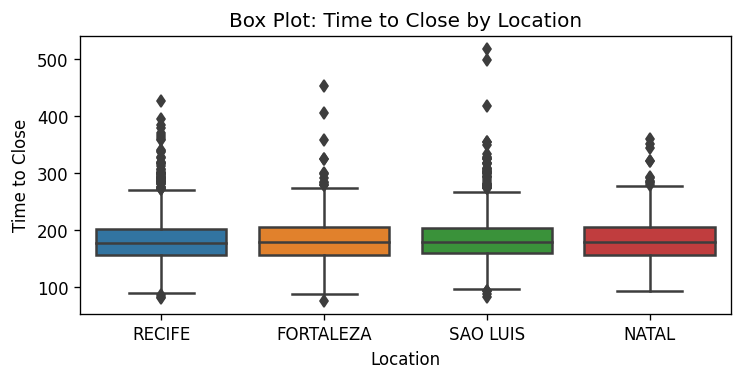

In [30]:
import seaborn as sns

# Create a box plot
sns.boxplot(x='location', y='time_to_close', data=df_fc)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Box Plot: Time to Close by Location')

# Show the plot
plt.show()

In [31]:
df_fc = df_fc[(df_fc['time_to_close'] < 350)] #remove outlier
df_fc.tail(10)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
1990,1991,195,53696.25,45350.97,NATAL,13,False,unknown
1991,1992,177,26922.01,23825.33,RECIFE,10,False,meat
1992,1993,132,10457.93,8609.75,RECIFE,3,False,meat
1993,1994,202,40625.73,30305.85,RECIFE,12,False,meat
1994,1995,143,22642.03,19776.14,RECIFE,13,False,vegetable
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat
1999,2000,150,8051.40,6417.92,RECIFE,4,False,vegetable


After removing the outlier, we can focus on the main range of data. Below are some observations and potential solutions:

1. The distribution of closing times shows significant variability:
- For the "RECIFE" and "FORTALEZA" locations, the closing time ranges from approximately 130 to 250 days, with the majority of compensation requests falling between 160 and 200 days.
- For the "SAO LUIS" and "NATAL" locations, the closing time ranges from approximately 110 to 210 days, with the majority of compensation requests falling between 140 and 180 days.
2. The "RECIFE" location exhibits the highest variability in closing time, with a range of around 130 to 250 days and several outliers.
3. The "FORTALEZA" location has a relatively even distribution of closing time, with a relatively high median.
4. The "SAO LUIS" and "NATAL" locations have relatively similar and lower median closing times.


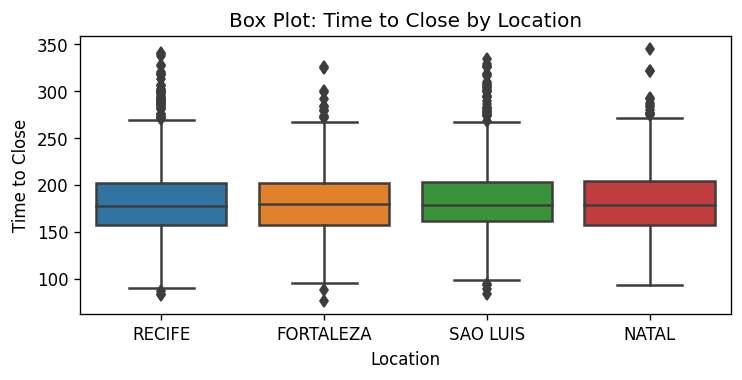

In [32]:
# Create a box plot
sns.boxplot(x='location', y='time_to_close', data=df_fc)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Box Plot: Time to Close by Location')

# Show the plot
plt.show()

To improve the closing time of compensation requests, consider the following potential solutions:

1. For the "RECIFE" location:
- Investigate and analyze the factors contributing to the prolonged processing time, including current processes, systems, and resources.
- Consider allocating additional resources, both in terms of personnel and finances, to expedite and enhance the handling of compensation requests.
2. For the "FORTALEZA" location:
- Evaluate and optimize the processing workflow, focusing on identifying and addressing any bottlenecks or obstacles in the closing process.
- Ensure that the location has sufficient resources and personnel to handle compensation requests efficiently. If necessary, consider increasing staff or reallocating resources.
3. For the "SAO LUIS" and "NATAL" locations:
- Continuously monitor and evaluate the processing time to detect and address any issues as early as possible.
- Implement technology and support systems to optimize the processing workflow and reduce closing time, such as automation of certain tasks, effective compensation management systems, and improved communication and information sharing between relevant departments.